In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from Bio import SeqIO
import squarify
from matplotlib_venn import venn3
plt.style.use("seaborn-paper")
import venn
import numpy as np
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette())


In [133]:
import venn


In [171]:
fn = "../Data/knockouts/all_optknock_results_0.5.csv"
df = pd.read_csv(fn)
df["Production"] = (df["Production"]-1)*100
df["Growth"] = -(df["Growth"]-1)*100

In [187]:
df

,ID,Growth,Production,BGC type,BGC
0,CITCIa2,0.069581,1.240310,thiopeptide,1471
1,ERTHMMOR,0.069581,1.240310,thiopeptide,1471
2,CITCIb,0.069581,1.240310,thiopeptide,1471
3,CITMS,0.069581,1.240310,thiopeptide,1471
4,CITCIb,0.069581,1.292407,NRPS,1024
...,...,...,...,...,...
3537,CITCIa2,0.069581,2.105263,NRPS,1415
3538,CITCIb,0.069581,2.105263,NRPS,1415
3539,CITMS,0.069581,2.105263,NRPS,1415
3540,PGM,0.637142,0.258398,NRPS,1415


In [178]:
sns.displot?

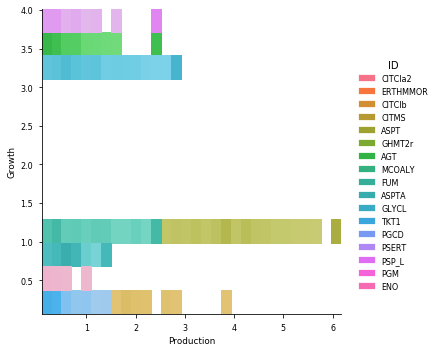

In [179]:
sns.displot(x = "Production", y = "Growth", hue = "ID", data = df)

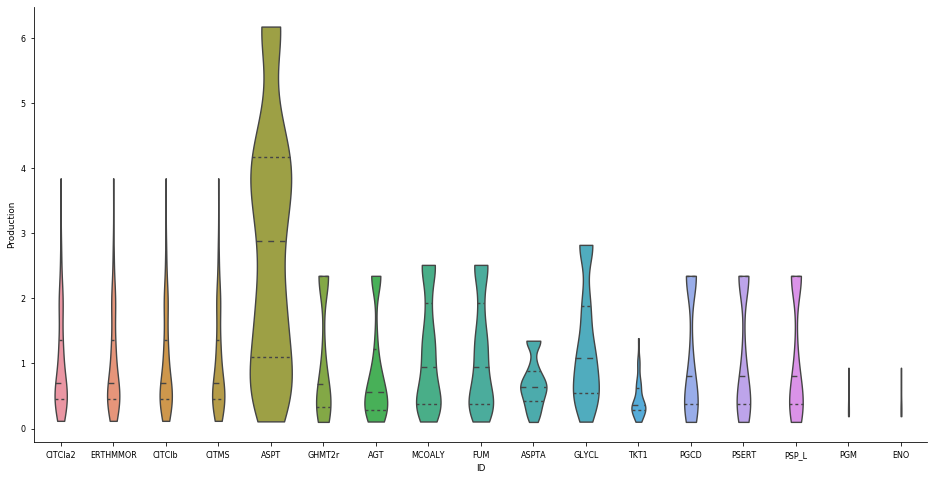

In [205]:
fig, ax = plt.subplots(1, figsize = (16,8))
sns.violinplot(y = "Production",  x = "ID", data = df,ax = ax, scale="count", cut = 0,  inner="quartile")
sns.despine()

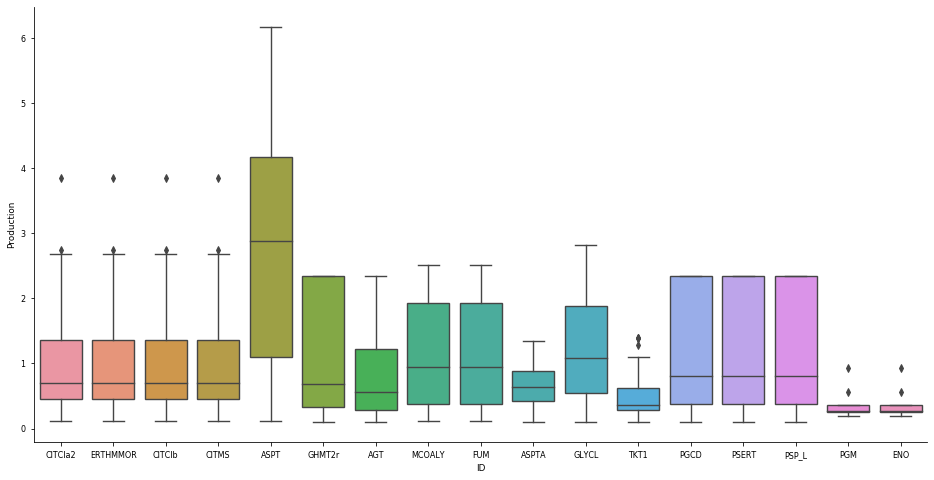

In [202]:
fig, ax = plt.subplots(1, figsize = (16,8))
sns.boxplot(y = "Production",  x = "ID", data = df,ax = ax)
#sns.stripplot(y = "Production",  x = "ID", data = df,ax = ax)
sns.despine()

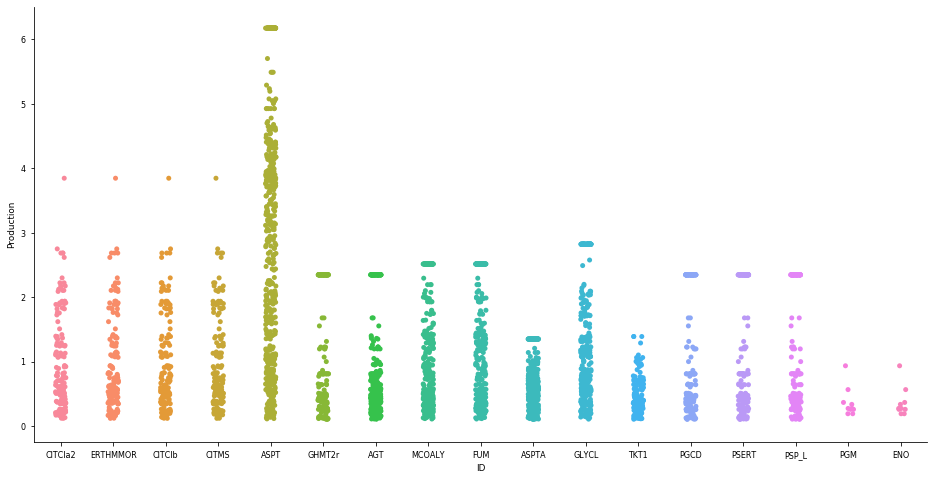

In [206]:
fig, ax = plt.subplots(1, figsize = (16,8))
#sns.boxplot(y = "Production",  x = "ID", data = df,ax = ax)
sns.stripplot(y = "Production",  x = "ID", data = df,ax = ax)
sns.despine()

In [167]:
df_grouped = df.groupby("ID").agg("mean").loc[:, ["Growth", "Production"]]


In [168]:
df_grouped

,Growth,Production
ID,,
AGT,0.965116,0.896122
ASPT,0.988208,2.847677
ASPTA,0.991974,0.707646
CITCIa2,0.999304,0.964374
CITCIb,0.999304,0.964374
CITMS,0.999304,0.964374
ENO,0.993629,0.364310
ERTHMMOR,0.999304,0.964374
FUM,0.989023,1.156478


In [170]:
df_grouped.plot(kind = "bar", y = "Production")

,Growth,Production
ID,,
AGT,0.965116,0.896122
ASPT,0.988208,2.847677
ASPTA,0.991974,0.707646
CITCIa2,0.999304,0.964374
CITCIb,0.999304,0.964374
CITMS,0.999304,0.964374
ENO,0.993629,0.364310
ERTHMMOR,0.999304,0.964374
FUM,0.989023,1.156478


C:\Users\snorres\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


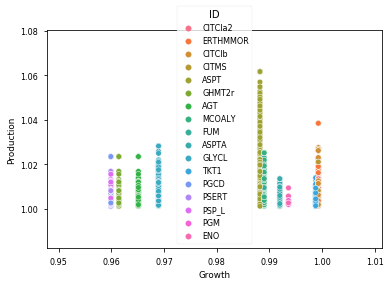

In [155]:
sns.scatterplot("Growth", "Production", hue = "ID", data = df)

In [3]:
folders = ["../Data/validation_pathways/knockouts", "../Data/knockouts"]
pathway_mibig_dict = {
    "Anabaenopeptin": 302,
    "Bafilomycin": 28,
    "Difficidin": 176,
    "Geldanamycin": 66,
    "Leupyrrin": 380,
    "Oocydin": 1032,
    "Oxazolomycin": 1106,
    "Tolaasin": 447
}

In [105]:
knockout_dict = {}
for name, bgc_int in pathway_mibig_dict.items():
    real_df = pd.read_csv(folders[0]+"/brute_optknock_{0}_0.5.csv".format(name))
    constructed_df = pd.read_csv(folders[1]+"/brute_optknock_{0}_0.5.csv".format(bgc_int))
    reactions = list(real_df["ID"])+list(constructed_df["ID"])
    if len(real_df["ID"])==0:
        reactions.append("No targets")
    if len(constructed_df["ID"])==0:
        reactions.append("No targets")
    r_dict = {}
    for r in set(reactions):
        r_dict[r] = str(int(reactions.count(r)))
    knockout_dict[name] = r_dict

In [119]:
df = pd.DataFrame(knockout_dict).T
df["No targets"] = df.pop("No targets")
mask = df.isna()

In [120]:
df = df.astype(str)

In [42]:
import catheat

In [58]:
catheat.heatmap??

In [123]:
df.values

array([['2', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
        'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'],
       ['nan', '2', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
        'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'],
       ['nan', '2', '2', '1', '2', '2', '1', '2', 'nan', 'nan', 'nan',
        'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'],
       ['1', '1', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
        'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', '1'],
       ['nan', '1', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', '1', '1',
        '1', '1', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'],
       ['nan', '2', '2', 'nan', '2', '2', '2', '2', 'nan', 'nan', 'nan',
        'nan', '1', '1', '1', '1', 'nan', 'nan'],
       ['nan', '1', 'nan', 'nan', 'nan', 'nan', '1', '1', 'nan', 'nan',
        'nan', 'nan', 'nan', 'nan', 'nan', 'nan', '1', 'nan'],
       ['nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan

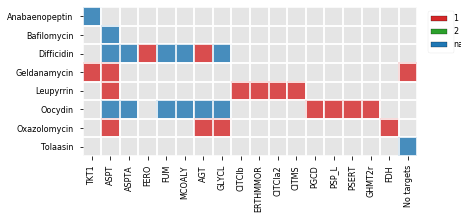

In [131]:
ax = catheat.heatmap(df, square = True, linewidths=1, linecolor='w', cmap = {"nan":"C0", "1":"C3","2":"C2"}, palette = "muted", alpha = 0.8, mask = mask)
ax[0].set_facecolor('#e5e5e5')
plt.subplots_adjust(right = 0.9)

In [74]:
ax

(<matplotlib.axes._subplots.AxesSubplot at 0x2776982ae10>,
 {'1.0': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
  '2.0': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
  'nan': (1.0, 0.4980392156862745, 0.054901960784313725)})

In [15]:
constructed_df

,ID,Growth,Production,BGC type
0,TKT1,0.998795,1.006811,NRPS


In [43]:
plt.cycler?

                          Correct  Total      Ratio
Domain function in total      177    215  82.325581
Extender units                 72     92  78.260870
Non-extending domains         103    123  83.739837
Starter units                   5      8  62.500000


Text(82, 0, '175/223')

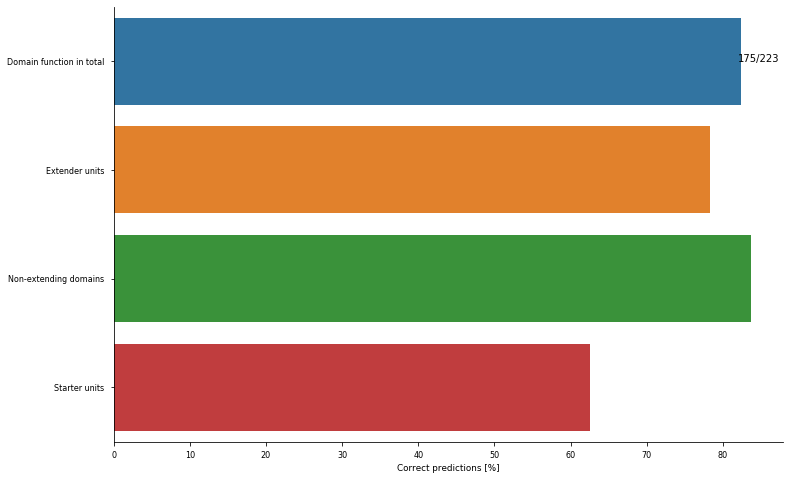

In [7]:
prediction_scores = {
    "Domain function in total": [177, 215],
    "Extender units": [72, 92],
    "Non-extending domains": [103, 123],
    "Starter units": [5, 8]}
fn = "../Data/prediction_accuracy_8_experimental.xlsx"
df2 = pd.read_excel(fn, index_col = 0).T["SUM"]


fig, ax = plt.subplots(1, figsize = (12, 8))
df = pd.DataFrame(prediction_scores).T
df.columns = ["Correct", "Total"]
df["Ratio"] = 100*df["Correct"] / df["Total"]
print(df)
plt.set_cmap("tab10")
b = sns.barplot(y = df.index, x = "Ratio", data = df, ax = ax)
sns.despine()
ax.set_xlabel("Correct predictions [%]")
ax.set_ylabel("")
ax.annotate("175/223", (82, -0))

In [8]:
c

Total domains            215
Correct domains          177
Total KS domains          92
Correct KS domains        72
Total other domains      123
Correct other domains    105
Note                     NaN
Name: SUM, dtype: object

In [10]:
df2

Total domains            215
Correct domains          177
Total KS domains          92
Correct KS domains        72
Total other domains      123
Correct other domains    105
Note                     NaN
Name: SUM, dtype: object

In [9]:
df

,Correct,Total,Ratio
Domain function in total,177,215,82.325581
Extender units,72,92,78.260870
Non-extending domains,103,123,83.739837
Starter units,5,8,62.500000


In [4]:
for bar in b.patches:
    print(bar.get_height())
    print(bar.get_xy())

0.8
(0, -0.4)
0.8
(0, 0.6)
0.8
(0, 1.6)
0.8
(0, 2.6)


In [23]:
fn = "../Data/prediction_accuracy_8_experimental.xlsx"
df = pd.read_excel(fn, index_col = 0)

In [24]:
df.drop(columns = "Note", index = "SUM", inplace = True)

In [33]:
cmap = sns.color_palette(as_cmap = True)

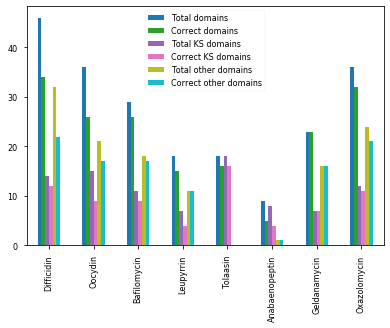

In [39]:
df.plot(kind = "bar", cmap = cmap)

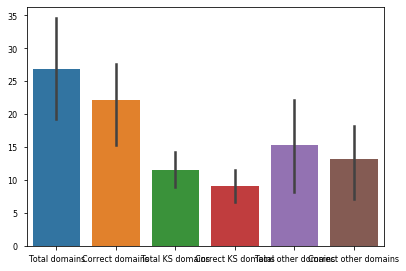

In [41]:
sns.barplot(data = df)

NameError: name 'autolabel' is not defined

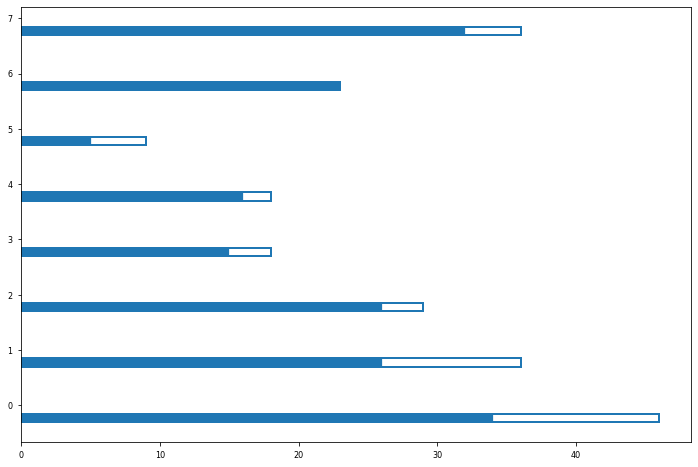

In [42]:
fig, ax = plt.subplots(1, figsize = (12, 8))
width = 0.15
space = 0.3
x = np.arange(8)-(width+space)/2
plt.set_cmap(cmap)
bars = ax.barh(x, df.loc[:, "Total domains"], width, color = "none", edgecolor = "C0", alpha = 1, label = "Total domains")
bars2 = ax.barh(x, df.loc[:, "Correct domains"],width,  edgecolor = "C0", alpha = 1)
for bar in bars:
    bar.set_edgecolor("C0")
    bar.set_linewidth(2)
autolabel(bars, bars2)

x = np.arange(8)
bars = ax.barh(x, df.loc[:, "Total KS domains"], width, color = "none", edgecolor = "C1", alpha = 1, label = "Extending domains")
bars2 = ax.barh(x, df.loc[:, "Correct KS domains"], width, edgecolor = "C1", alpha = 1)
for bar in bars:
    bar.set_edgecolor("C1")
    bar.set_linewidth(2)
    
autolabel(bars, bars2)


x = np.arange(8)+(width+space)/2
bars = ax.barh(x, df.loc[:, "Total other domains"], width, color = "none", edgecolor = "C2", alpha = 1, label = "Non-extending domains")
bars2 = ax.barh(x, df.loc[:, "Correct other domains"], width, edgecolor = "C2", alpha = 1)
for bar in bars:
    bar.set_edgecolor("C2")
    bar.set_linewidth(2)
    
autolabel(bars, bars2)
ax.set_yticklabels([1]+list(df.index))#, rotation = 90)
print(df.index)
ax.set_xlim(0, 52)
sns.despine()
plt.legend()

In [19]:
rect = bars[0]

In [20]:
rect.get_width()

32

C:\Users\snorres\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


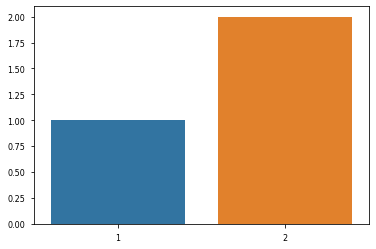

In [18]:
b = sns.barplot([1,2], [1,2])

In [16]:
b2 = ax.bar([1,2], [1,2])

In [19]:
b.patches

In [36]:

def autolabel(rects, rects2):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect, rect2 in zip(rects, rects2):
        height = rect.get_width()
        ax.annotate('{0}/{1}'.format(rect2.get_width(), height),
                    xy=(rect.get_width(), rect.get_y()),
                    xytext=(4,-1),#(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='left', va='bottom')#, rotation = 90)


# Figure 2


In [5]:
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt

RiPPS = ["lanthipeptide", "thiopeptide", "lassopeptide"]

In [5]:
def _get_strain_knowledge(cluster_path):  # yes
    gb_list = []
    for gb_record in SeqIO.parse(open(cluster_path, "r"), "genbank"):
        gb_list.append(gb_record)
    g = gb_list[0]
    return g.annotations["taxonomy"]

In [28]:
""" Create the figure displaying the number of successful bigmec constructions"""
filename = "../Data/constructed_pathways/summary.csv"
df = pd.read_csv(filename, index_col = 0)
print(df)

       BGC  Success                   BGC type
0        1        1                      T1PKS
1       10        0                        NaN
2      100        1                      T1PKS
3     1000        1                 NRPS/T1PKS
4     1001        1  T3PKS/PKS-like/NRPS/T1PKS
...    ...      ...                        ...
1878   995        1  NRPS/transAT-PKS/PKS-like
1879   996        1                 NRPS/T1PKS
1880   997        1                 NRPS/T1PKS
1881   998        1                 NRPS/T1PKS
1882   999        1                 NRPS/T1PKS

[1883 rows x 3 columns]


In [100]:
df_success

,BGC,Success,BGC type,BGC class
0,1,1,T1PKS,T1PKS
2,100,1,T1PKS,T1PKS
3,1000,1,NRPS/T1PKS,NRPS/T1PKS
4,1001,1,T3PKS/PKS-like/NRPS/T1PKS,T3PKS/PKS-like/NRPS/T1PKS
5,1002,1,NRPS/T1PKS,NRPS/T1PKS
...,...,...,...,...
1878,995,1,NRPS/transAT-PKS/PKS-like,NRPS/transAT-PKS/PKS-like
1879,996,1,NRPS/T1PKS,NRPS/T1PKS
1880,997,1,NRPS/T1PKS,NRPS/T1PKS
1881,998,1,NRPS/T1PKS,NRPS/T1PKS


In [34]:
dict_list = []
for i, row in df_success.iterrows():
    dic = {}
    bgc_types = row["BGC type"].split("/")
    bgc_types
    for k in bgc_types:
        print(k)
        dic[k] = True
    dic["BGC"] = row["BGC"]
    dict_list.append(dic)

T1PKS
T1PKS
NRPS
T1PKS
T3PKS
PKS-like
NRPS
T1PKS
NRPS
T1PKS
NRPS
T1PKS
other
oligosaccharide
T1PKS
NRPS
transAT-PKS-like
NRPS-like
T1PKS
NRPS-like
T1PKS
NRPS
T1PKS
NRPS
T1PKS
NRPS
T1PKS
NRPS
T1PKS
NRPS
T1PKS
NRPS
T1PKS
NRPS
T1PKS
NRPS
T1PKS
NRPS
T1PKS
NRPS
T1PKS
NRPS
NRPS
T1PKS
T1PKS
NRPS
NRPS
T1PKS
NRPS
T1PKS
NRPS
T1PKS
transAT-PKS-like
transAT-PKS
PKS-like
NRPS
NRPS
T1PKS
NRPS
NRPS
T1PKS
NRPS
T1PKS
T1PKS
NRPS
T1PKS
T3PKS
transAT-PKS-like
transAT-PKS
PKS-like
T3PKS
transAT-PKS-like
transAT-PKS
PKS-like
NRPS
T1PKS
NRPS
T1PKS
NRPS
betalactone
T1PKS
other
NRPS
T1PKS
NRPS
T1PKS
amglyccycl
T1PKS
NRPS
T1PKS
T1PKS
NRPS
T1PKS
NRPS
T1PKS
NRPS
PKS-like
hglE-KS
T1PKS
NRPS
T1PKS
indole
NRPS
NRPS
NRPS
terpene
T1PKS
NRPS
T1PKS
NRPS
T1PKS
NRPS
T1PKS
T1PKS
NRPS
NRPS
T1PKS
NRPS
T1PKS
NRPS
T1PKS
NRPS
T1PKS
NRPS
T1PKS
NRPS
PUFA
hglE-KS
T1PKS
NRPS
T1PKS
NRPS
NRPS
T1PKS
NRPS-like
T1PKS
T2PKS
PKS-like
T1PKS
T2PKS
PKS-like
T1PKS
NRPS-like
T1PKS
T3PKS
PKS-like
T1PKS
nucleoside
T3PKS
T1PKS
T3PKS
NRPS-like
T1P

In [56]:
df_venn = pd.DataFrame(dict_list)
df_venn = df_venn.fillna(False)

In [57]:
df_venn.loc[df_venn["PKS-like"]==True, :]


,T1PKS,BGC,NRPS,T3PKS,PKS-like,other,oligosaccharide,transAT-PKS-like,NRPS-like,transAT-PKS,...,aminocoumarin,butyrolactone,arylpolyene,hserlactone,siderophore,lanthipeptide,bacteriocin,phenazine,blactam,melanin
3,True,1001,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27,False,1025,True,False,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
34,False,1031,False,True,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
35,False,1032,False,True,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
46,True,1042,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
66,True,1061,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
67,True,1062,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69,True,1064,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76,True,1071,True,True,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
85,False,1091,False,False,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [78]:
cols = ["T1PKS", "transAT-PKS-like", "transAT-PKS", "NRPS-like", "NRPS", "PKS-like", "BGC"]
other_columns = [x for x in df_venn.columns if not x in cols]

In [80]:
other_columns

['T3PKS',
 'other',
 'oligosaccharide',
 'betalactone',
 'amglyccycl',
 'hglE-KS',
 'indole',
 'terpene',
 'PUFA',
 'T2PKS',
 'nucleoside',
 'ladderane',
 'aminocoumarin',
 'butyrolactone',
 'arylpolyene',
 'hserlactone',
 'siderophore',
 'lanthipeptide',
 'bacteriocin',
 'phenazine',
 'blactam',
 'melanin']

In [79]:
df_venn2 = pd.DataFrame()
df_venn2["T1PKS"] = df_venn["T1PKS"]
df_venn2["TransAT-PKS"] = df_venn[["transAT-PKS-like", "transAT-PKS"]].sum(axis = 1).astype(bool)
df_venn2["NRPS"] = df_venn[["NRPS-like", "NRPS"]].sum(axis = 1).astype(bool)
df_venn2["Other"] = df_venn[other_columns].sum(axis = 1).astype(bool)
df_venn2.index = df_venn["BGC"]

In [83]:
import venn

In [98]:
dic = {"PKS": set(df_venn2[df_venn2["T1PKS"]].index),
       "TransAT-PKS": set(df_venn2[df_venn2["TransAT-PKS"]].index),
       "NRPS": set(df_venn2[df_venn2["NRPS"]].index),
       "Other": set(df_venn2[df_venn2["Other"]].index)}

In [91]:
dic

{'PKS': [1,
  100,
  1000,
  1001,
  1002,
  1003,
  1004,
  1006,
  1007,
  1008,
  1009,
  1010,
  1011,
  1012,
  1013,
  1014,
  1015,
  1016,
  1017,
  1019,
  102,
  1022,
  1023,
  1024,
  1026,
  1028,
  1029,
  103,
  1030,
  1033,
  1034,
  1035,
  1036,
  1037,
  1038,
  1039,
  104,
  1040,
  1041,
  1042,
  1043,
  1046,
  1047,
  1048,
  1049,
  105,
  1051,
  1052,
  1053,
  1054,
  1055,
  1056,
  1057,
  1059,
  106,
  1061,
  1062,
  1063,
  1064,
  1065,
  1066,
  1067,
  1069,
  107,
  1070,
  1071,
  1072,
  108,
  109,
  1094,
  11,
  110,
  1102,
  111,
  1118,
  1119,
  112,
  1122,
  1124,
  1125,
  113,
  1130,
  1136,
  114,
  1143,
  1144,
  115,
  1159,
  116,
  1160,
  1161,
  1162,
  1163,
  1164,
  1165,
  1169,
  117,
  1172,
  118,
  1182,
  1183,
  1187,
  119,
  1190,
  1194,
  1195,
  1199,
  12,
  120,
  1200,
  1202,
  1203,
  1204,
  1205,
  121,
  1212,
  1213,
  1215,
  1216,
  1218,
  122,
  123,
  1230,
  1231,
  1235,
  1236,
  1237,
  124,


In [102]:
venn.venn??

In [32]:
# Rename
df_success = df.loc[df["Success"]== 1, :]
bgc_type_merge =  []
for x in  df_success["BGC type"]:
    lst = x.split("-")
    if (len(lst) > 1) and lst[0]==lst[1]:
        bgc_class = lst[0]
    else:
        bgc_class = x
    if bgc_class.strip() in RiPPS:
        bgc_class = "RiPPs"
    bgc_type_merge.append(bgc_class)
df_success["BGC class"] = bgc_type_merge


C:\Users\snorres\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [72]:
cluster_types = df_success.groupby("BGC class").count()

In [73]:
cluster_types["BGC"].name = ""

In [74]:
cluster_types

,BGC,Success,BGC type
BGC class,,,
NRPS,528,528,528
NRPS-like,20,20,20
RiPPs,133,133,133
T1PKS,316,316,316
transAT-PKS,67,67,67
transAT-PKS-like,12,12,12


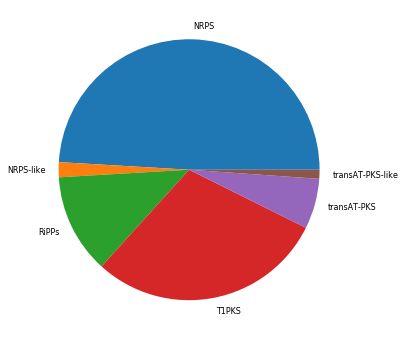

In [75]:
# Convert to treemap
fig = cluster_types["BGC"].plot(title = None, figsize = (6, 6), kind = "pie")
plt.savefig("bigmec_pie_chart.svg")

In [76]:
colors = plt.get_cmap("tab10", len(cluster_types.index))

In [77]:
colors.colors

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.89019608, 0.46666667, 0.76078431, 1.        ],
       [0.7372549 , 0.74117647, 0.13333333, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ]])

In [78]:
cluster_types

,BGC,Success,BGC type
BGC class,,,
NRPS,528,528,528
NRPS-like,20,20,20
RiPPs,133,133,133
T1PKS,316,316,316
transAT-PKS,67,67,67
transAT-PKS-like,12,12,12


(0.0, 100.0, 0.0, 100.0)

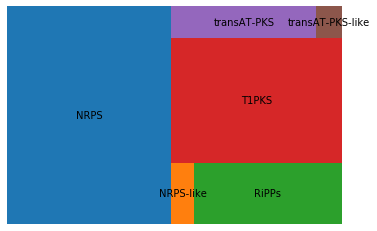

In [79]:
l = squarify.plot(label = cluster_types.index, sizes = cluster_types["BGC"], color=sns.color_palette("tab10"))
plt.axis("off")
#plt.legend(l.get_legend_handles_labels())

In [16]:
squarify.plot?

In [17]:
bgc_ids = list(df_success["BGC"])
taxonomy_list = []
for i in bgc_ids:
    fn = "../Data/mibig/{0}.gbk".format(i)
    tax = _get_strain_knowledge(fn)
    taxonomy_list.append(tax)

In [18]:
df_tax = pd.DataFrame(taxonomy_list)
df_tax = df_tax.sort_values(0)

In [19]:
df_tax

,0,1,2,3,4,5,6,7,8,9,10,11
0,Bacteria,Actinobacteria,Micromonosporales,Micromonosporaceae,Verrucosispora,None,None,None,None,None,None,None
686,Bacteria,Actinobacteria,Pseudonocardiales,Pseudonocardiaceae,Amycolatopsis,None,None,None,None,None,None,None
687,Bacteria,Actinobacteria,Corynebacteriales,Nocardiaceae,Nocardia,None,None,None,None,None,None,None
688,Bacteria,Proteobacteria,Deltaproteobacteria,Myxococcales,Sorangiineae,Polyangiaceae,Jahnella,None,None,None,None,None
689,Bacteria,Proteobacteria,Deltaproteobacteria,Myxococcales,Sorangiineae,Polyangiaceae,Jahnella,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
253,Eukaryota,Fungi,Dikarya,Ascomycota,Pezizomycotina,Eurotiomycetes,Eurotiomycetidae,Eurotiales,Thermoascaceae,Byssochlamys,None,None
331,Eukaryota,Fungi,Dikarya,Ascomycota,Pezizomycotina,Sordariomycetes,Sordariomycetidae,Sordariales,Chaetomiaceae,Thermothelomyces,None,None
98,None,None,None,None,None,None,None,None,None,None,None,None
100,None,None,None,None,None,None,None,None,None,None,None,None


In [20]:
#g1 = df_tax.groupby([1, 2]).size().unstack(fill_value = 0)
g1 = df_tax.groupby(1).size()
g01 = df_tax.groupby([0, 1]).size().unstack(fill_value = 0)

In [21]:
g0 = df_tax.groupby(0).size()

In [22]:
g1["Fungi"] = g1.pop("Fungi")


In [23]:
 206

206

In [24]:
g1["Others"] = g1[g1<5].sum()
g1.name = ""

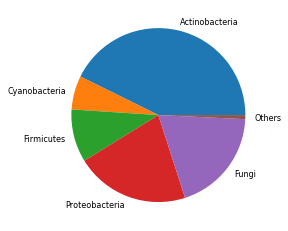

In [25]:
g1[g1>5].plot(kind = "pie", )

[None, None, None, None, None, None, None, None, None, None, None, None]

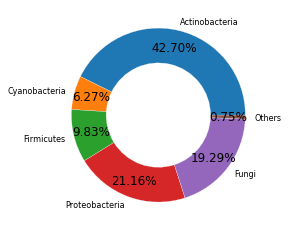

In [27]:
pie,_,txt = plt.pie(g1[g1>5], labels = g1[g1>5].index, radius = 1,autopct='%1.2f%%',  pctdistance=.8, )
#plt.legend(loc = )
width = 0.4
plt.setp(pie, width=width, edgecolor='white')
plt.setp(txt, size = 12)#, weight="bold")
#pi2, _ = plt.pie(g0, radius = 0.8)

# Figure knockouts


In [28]:

fn = "../Data/knockouts/all_optknock_results_0.5.csv"
df = pd.read_csv(fn)

In [29]:
g = df.groupby("BGC")

In [30]:
idx = g["Production", "B"].max()

C:\Users\snorres\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


KeyError: "Columns not found: 'B'"

In [31]:
max_rows = []
for i, group in g:
    maxx = group["Production"].max()
    ix = group["Production"] == maxx
    selected = group.loc[ix, :]
    
    max_rows += list(selected.index)
    

In [32]:
max_df = df.loc[max_rows, ["ID", "BGC type"]]

In [33]:
count_df = max_df.groupby(['ID', 'BGC type']).size().unstack(fill_value=0)

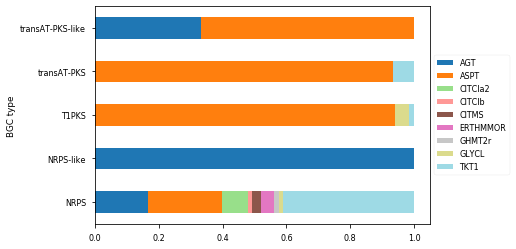

In [34]:
count_df_ratio = count_df/count_df.sum(axis = 0)
count_df_ratio.T.plot(kind = "barh", stacked = True, cmap = "tab20")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [35]:
squarify.plot?

In [36]:
count_df_full = df.groupby(['ID', 'BGC type']).size().unstack(fill_value=0)

In [37]:
count_df_full_ratio = count_df_full/count_df_full.sum(axis = 0)

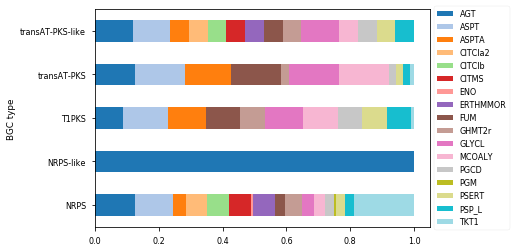

In [38]:
count_df_full_ratio.T.plot(kind = "barh", stacked = True, cmap = "tab20")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

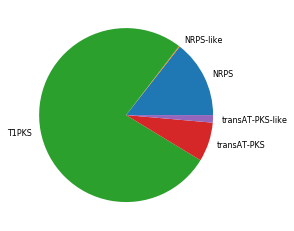

In [39]:
all_count = df.groupby("BGC type").count()["BGC"]
all_count.name = ""
all_count.plot(kind = "pie")

# Figure BGC length


In [43]:
from pathlib import Path
import cobra
folder = Path("../Data/constructed_pathways/")


In [50]:
df_success

,BGC,Success,BGC type,BGC class
0,1,1,T1PKS,T1PKS
2,100,1,T1PKS,T1PKS
3,1000,1,NRPS,NRPS
4,1001,1,NRPS,NRPS
5,1002,1,NRPS,NRPS
...,...,...,...,...
1878,995,1,transAT-PKS,transAT-PKS
1879,996,1,NRPS,NRPS
1880,997,1,NRPS,NRPS
1881,998,1,NRPS,NRPS


In [80]:
model_info_list = []
n_reactions_link_list = []
substrate_dct_list = []
bgc_type_list = []
for fn in folder.glob("*.json"):
    model = cobra.io.load_json_model(str(fn))
    n_reactions_total, n_reactions_link, substrate_dct = _get_model_info(model)
    model_info_list.append([fn.stem, n_reactions_link, n_reactions_total])
    substrate_dct_list.append(substrate_dct)

C:\Users\snorres\AppData\Local\Continuum\miniconda3\lib\site-packages\pandas\core\ops\array_ops.py:253 FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [88]:
df_info = pd.DataFrame(model_info_list, columns = ["ID", "Pathway length", "Total number of reactions"])

ValueError: 3 columns passed, passed data had 4 columns

In [96]:
df_info["ID"] = df_info["ID"].astype(int)
#df_info.drop(columns = "BGC type", inplace = True)

In [178]:
df_info

,ID,Pathway length,Total number of reactions,BGC_x,BGC type,BGC_y,BGC class
0,1,18,20,1,T1PKS,1,T1PKS
1,100,36,38,100,T1PKS,100,T1PKS
2,1000,6,8,1000,NRPS,1000,NRPS
3,1001,16,18,1001,NRPS,1001,NRPS
4,1002,6,28,1002,NRPS,1002,NRPS
...,...,...,...,...,...,...,...
1071,995,30,32,995,transAT-PKS,995,transAT-PKS
1072,996,4,6,996,NRPS,996,NRPS
1073,997,7,29,997,NRPS,997,NRPS
1074,998,11,33,998,NRPS,998,NRPS


In [114]:
df_info = df_info.merge(df_success[["BGC", "BGC class"]], left_on="ID", right_on= "BGC")

C:\Users\snorres\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\distributions.py:305 UserWarning: Dataset has 0 variance; skipping density estimate.


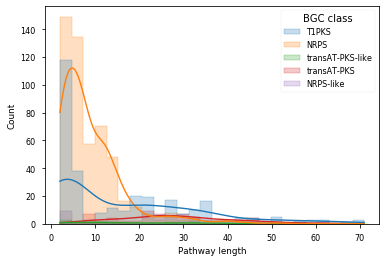

In [125]:
sns.histplot(data = df_info[df_info["Pathway length"]>1], x = "Pathway length", hue = "BGC class", 
             kde = True, element = "step")

In [117]:
df_info

,ID,Pathway length,Total number of reactions,BGC_x,BGC type,BGC_y,BGC class
0,1,18,20,1,T1PKS,1,T1PKS
1,100,36,38,100,T1PKS,100,T1PKS
2,1000,6,8,1000,NRPS,1000,NRPS
3,1001,16,18,1001,NRPS,1001,NRPS
4,1002,6,28,1002,NRPS,1002,NRPS
...,...,...,...,...,...,...,...
1071,995,30,32,995,transAT-PKS,995,transAT-PKS
1072,996,4,6,996,NRPS,996,NRPS
1073,997,7,29,997,NRPS,997,NRPS
1074,998,11,33,998,NRPS,998,NRPS


In [104]:
sns.histplot?

In [ ]:
sns.__version__

In [126]:
df_substrates = pd.DataFrame(substrate_dct_list)

In [127]:
df_substrates.index = df_info["ID"]

In [145]:
df_substrates

,index,malcoa_c,h_c,nadph_c,mmcoa__R_c,13dpg_c,emcoa__S_c,gly_c,amet_c,atp_c,...,d2hoiv_c,3mglutr_c,n11d1at_c,nadp_c,skm_c,26dap__M_c,L2aadp_c,ppcoa_c,BGC,BGC class
0,0,-6.0,-6.0,-6.0,-2.0,-1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,T1PKS
1,1,-6.0,-14.0,-14.0,-7.0,NaN,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,T1PKS
2,2,-2.0,-1.0,-1.0,NaN,NaN,NaN,-1.0,-1.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000,NRPS
3,3,-6.0,-5.0,-5.0,NaN,NaN,NaN,NaN,-1.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,NRPS
4,4,-2.0,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1002,NRPS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,1071,-12.0,-9.0,-9.0,NaN,-1.0,NaN,NaN,-2.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,995,transAT-PKS
1072,1072,-2.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,996,NRPS
1073,1073,-2.0,-1.0,-1.0,NaN,NaN,NaN,-1.0,NaN,-3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,997,NRPS
1074,1074,-4.0,-4.0,-4.0,NaN,NaN,NaN,-1.0,NaN,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998,NRPS


In [135]:
df_substrates = df_substrates.abs()
df_substrates = df_substrates.merge(df_success[["BGC", "BGC class"]], left_on="ID", right_on= "BGC")


TypeError: bad operand type for abs(): 'str'

In [144]:
df_substrates = df_substrates.reset_index()

KeyError: 'ID'

In [143]:
df_substrates

,index,malcoa_c,h_c,nadph_c,mmcoa__R_c,13dpg_c,emcoa__S_c,gly_c,amet_c,atp_c,...,d2hoiv_c,3mglutr_c,n11d1at_c,nadp_c,skm_c,26dap__M_c,L2aadp_c,ppcoa_c,BGC,BGC class
0,0,-6.0,-6.0,-6.0,-2.0,-1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,T1PKS
1,1,-6.0,-14.0,-14.0,-7.0,NaN,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,T1PKS
2,2,-2.0,-1.0,-1.0,NaN,NaN,NaN,-1.0,-1.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000,NRPS
3,3,-6.0,-5.0,-5.0,NaN,NaN,NaN,NaN,-1.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,NRPS
4,4,-2.0,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1002,NRPS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,1071,-12.0,-9.0,-9.0,NaN,-1.0,NaN,NaN,-2.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,995,transAT-PKS
1072,1072,-2.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,996,NRPS
1073,1073,-2.0,-1.0,-1.0,NaN,NaN,NaN,-1.0,NaN,-3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,997,NRPS
1074,1074,-4.0,-4.0,-4.0,NaN,NaN,NaN,-1.0,NaN,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998,NRPS


In [159]:
df = pd.melt(df_substrates, id_vars=['BGC', "BGC class"], value_vars = value_vars, value_name='Value')

In [175]:
df_substrates.drop("")

array([578350, -3005.0, -2742.0, -2870.0, -884.0, -62.0, -117.0, -928.0,
       -483.0, -2647.0, -930.0, -10.0, -698.0, -779.0, -737.0, -644.0,
       -566.0, -601.0, -501.0, -511.0, -1006.0, -968.0, -442.0, -568.0,
       -505.0, -467.0, -645.0, -614.0, -593.0, -488.0, -142.0, -24.0,
       -24.0, -4.0, -11.0, -42.0, -29.0, -31.0, -6.0, -2.0, -32.0, -48.0,
       -23.0, -23.0, -23.0, -23.0, -37.0, -21.0, -2.0, -2.0, -3.0, -4.0,
       -1.0, -1.0, -4.0, -3.0, 1080182,
       'T1PKST1PKSNRPSNRPSNRPSNRPST1PKStransAT-PKS-likeT1PKST1PKSNRPSNRPSNRPSNRPSNRPSNRPSNRPSNRPSNRPSNRPSNRPSNRPST1PKSNRPSNRPSNRPSNRPStransAT-PKSNRPSNRPSNRPSNRPST1PKSNRPStransAT-PKStransAT-PKSNRPSNRPSNRPSNRPSNRPST1PKSNRPST1PKSNRPStransAT-PKS-likeNRPSNRPSNRPSNRPSNRPSNRPSNRPSNRPST1PKSNRPSNRPSNRPSNRPSNRPSNRPSNRPSNRPSNRPSNRPST1PKST1PKST1PKST1PKST1PKST1PKST1PKST1PKStransAT-PKST1PKStransAT-PKStransAT-PKST1PKST1PKSNRPSNRPStransAT-PKS-liketransAT-PKST1PKStransAT-PKStransAT-PKStransAT-PKStransAT-PKS-likeNRPStransAT-PKStransAT-PKSt

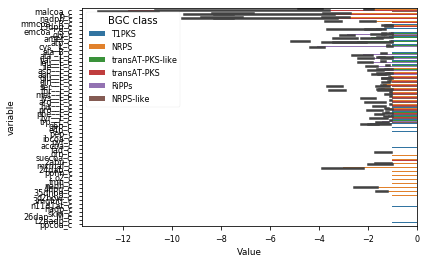

In [168]:
sns.barplot(data = df, x = "Value", hue = "BGC class", y = "variable")

In [156]:
value_vars = [x for x in df_substrates.columns if not x in ["BGC", "BGC class", "index"]]

In [155]:
value_vars = 

Index(['index', 'malcoa_c', 'h_c', 'nadph_c', 'mmcoa__R_c', '13dpg_c',
       'emcoa__S_c', 'gly_c', 'amet_c', 'atp_c', 'cys__L_c', 'ala_B_c',
       'ala__L_c', 'val__L_c', 'leu__L_c', 'ile__L_c', 'asp__L_c', 'asn__L_c',
       'glu__L_c', 'gln__L_c', 'ser__L_c', 'thr__L_c', 'met__L_c', 'lys__L_c',
       'arg__L_c', 'his__L_c', 'pro__L_c', 'phe__L_c', 'tyr__L_c', 'trp__L_c',
       'g6p_c', 'e4p_c', 'pep_c', 'ibcoa_c', 'pyr_c', 'accoa_c', 'fad_c',
       'orn_c', 'succoa_c', '2abu_c', 'mxmal_c', '24dab_c', 'pphn_c', 'o2_c',
       'fmn_c', 'nadh_c', '4hpg_c', '35dhpg_c', 'd2hoiv_c', '3mglutr_c',
       'n11d1at_c', 'nadp_c', 'skm_c', '26dap__M_c', 'L2aadp_c', 'ppcoa_c',
       'BGC', 'BGC class'],
      dtype='object')

In [149]:
value_vars = df_substrates.columns

,index,malcoa_c,h_c,nadph_c,mmcoa__R_c,13dpg_c,emcoa__S_c,gly_c,amet_c,atp_c,...,d2hoiv_c,3mglutr_c,n11d1at_c,nadp_c,skm_c,26dap__M_c,L2aadp_c,ppcoa_c,BGC,BGC class
0,0,-6.0,-6.0,-6.0,-2.0,-1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,T1PKS
1,1,-6.0,-14.0,-14.0,-7.0,NaN,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,T1PKS
2,2,-2.0,-1.0,-1.0,NaN,NaN,NaN,-1.0,-1.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000,NRPS
3,3,-6.0,-5.0,-5.0,NaN,NaN,NaN,NaN,-1.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,NRPS
4,4,-2.0,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1002,NRPS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,1071,-12.0,-9.0,-9.0,NaN,-1.0,NaN,NaN,-2.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,995,transAT-PKS
1072,1072,-2.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,996,NRPS
1073,1073,-2.0,-1.0,-1.0,NaN,NaN,NaN,-1.0,NaN,-3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,997,NRPS
1074,1074,-4.0,-4.0,-4.0,NaN,NaN,NaN,-1.0,NaN,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998,NRPS


In [134]:
sns.barplot(data = df_substrates, x = hue = "BGC class")

ValueError: Cannot use `hue` without `x` and `y`

In [ ]:
_get_model_info(model)

In [42]:
def _get_model_info(model):
    #    for r in model.reactions:
    #        print(r.id, "\t", r.reaction)
    n_reactions_total = len(model.reactions)
    n_reactions_link = 0
    for r in model.reactions:
        
        try:
            i = int(r.id.split("_")[-1])
        except:
            pass
        else:
            if i > n_reactions_link:
                n_reactions_link = i
    
    lump_reaction = _lump_reaction(model)
    substrate_dct = _get_substrate_dict(lump_reaction)
    return n_reactions_total, n_reactions_link, substrate_dct
    
def _lump_reaction(model):
    for i, r in enumerate(model.reactions):
        if i == 0:
            lump_reaction = r
        else:
            lump_reaction += r
    return lump_reaction

def _get_substrate_dict(r):
    dct = {}
    for m, i in r.metabolites.items():
        if i < 0:
            dct[m.id]=i
    return dct
    

In [ ]:
r = _lump_reaction(model)

In [ ]:
model.description